In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from itertools import combinations

In [2]:
cluster_df = pd.read_csv('./data/cluster_Data.csv')

In [3]:
scaler = MinMaxScaler()

In [4]:
column_names = cluster_df.columns
scaled_data = scaler.fit_transform(cluster_df)
new_df = pd.DataFrame(scaled_data, columns=column_names)
cluster_df = new_df.copy()


#### Find optimal number of clusters through elbow method

In [5]:
intertia = []

for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(cluster_df)
    intertia.append(kmeans.inertia_)
    

C:\Users\mimslade\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [6]:
num_clusters = (range(1, len(intertia) + 1))
y = intertia
kn = KneeLocator(num_clusters, y, curve='convex', direction='decreasing')

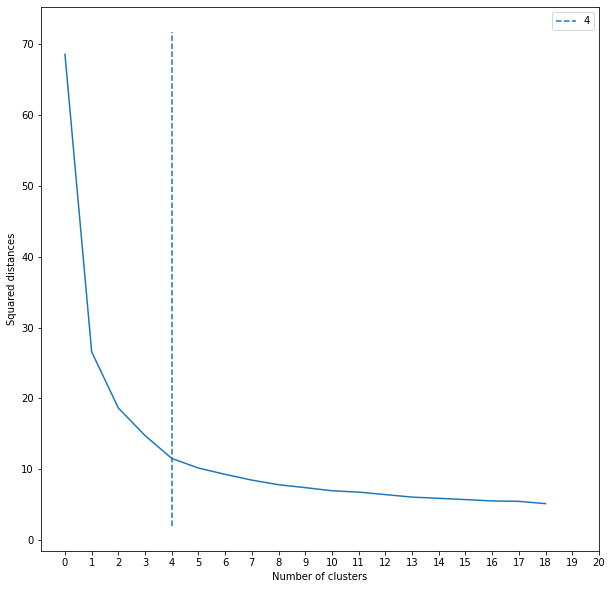

In [7]:
plt.figure(figsize=(10, 10))
plt.plot(range(len(intertia)), intertia)
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', label=kn.knee)
plt.xlabel('Number of clusters')
plt.ylabel('Squared distances')
plt.legend()
plt.xticks(np.arange(0, 21))
plt.show()

In [8]:
kmeans = KMeans(n_clusters = 4, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(cluster_df)

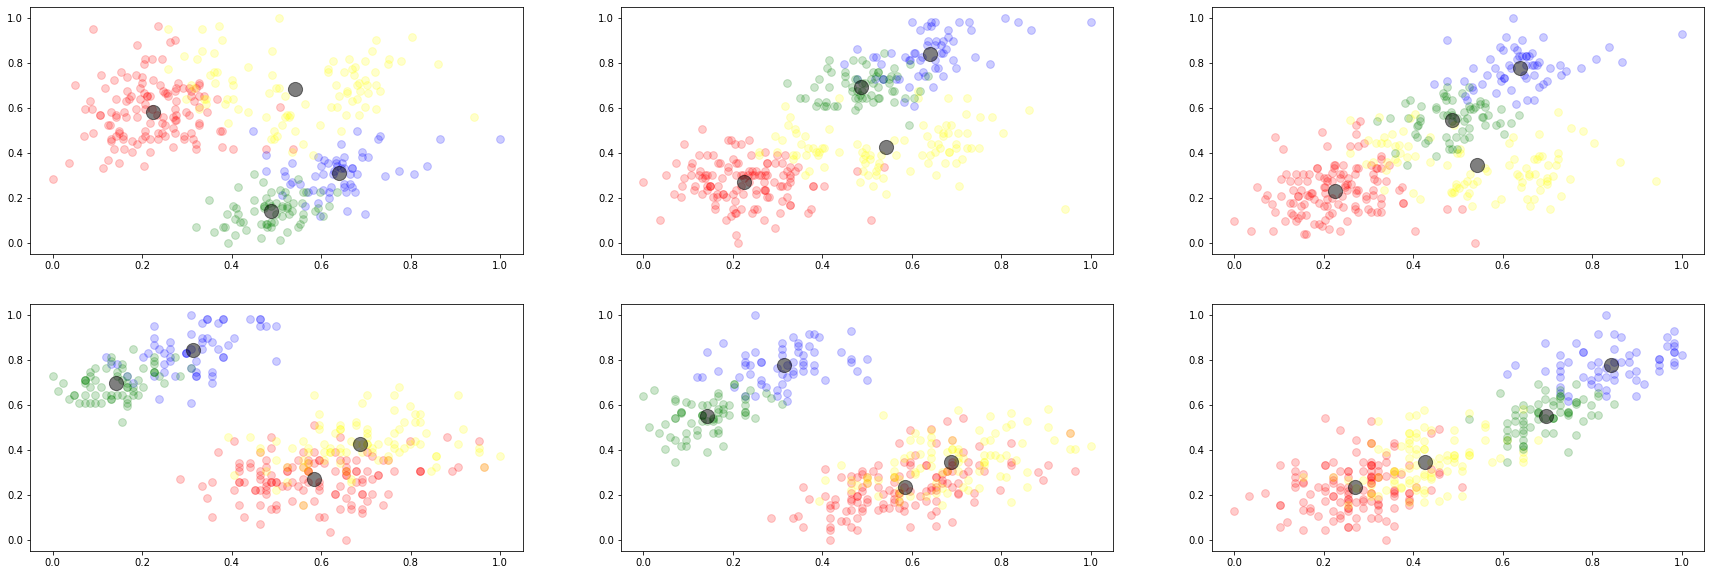

In [9]:
feature_combinations = combinations(range(4), 2)
fig, axis = plt.subplots(2, 3, figsize=(30, 10))
for plot_index, features in enumerate(feature_combinations):
    feature_one, feature_two = features
    x_groups = []
    y_groups = []
    for i in range(4):
        x_groups.append(cluster_df.iloc[y_kmeans == i, feature_one])
        y_groups.append(cluster_df.iloc[y_kmeans == i, feature_two])

    centers = kmeans.cluster_centers_
    colors = ['red', 'blue', 'yellow', 'green']
    plot_x = plot_index % 3
    plot_y = int(plot_index >= 3)
    for i in range(4):
        plot_index % 3
        axis[plot_y, plot_x].scatter(x_groups[i], y_groups[i], s=60, c=colors[i], label=f'Cluster{i}', alpha=0.2)

    axis[plot_y, plot_x].scatter(centers[:, feature_one], centers[:, feature_two], c='black', s=200, alpha=0.5)

plt.show()